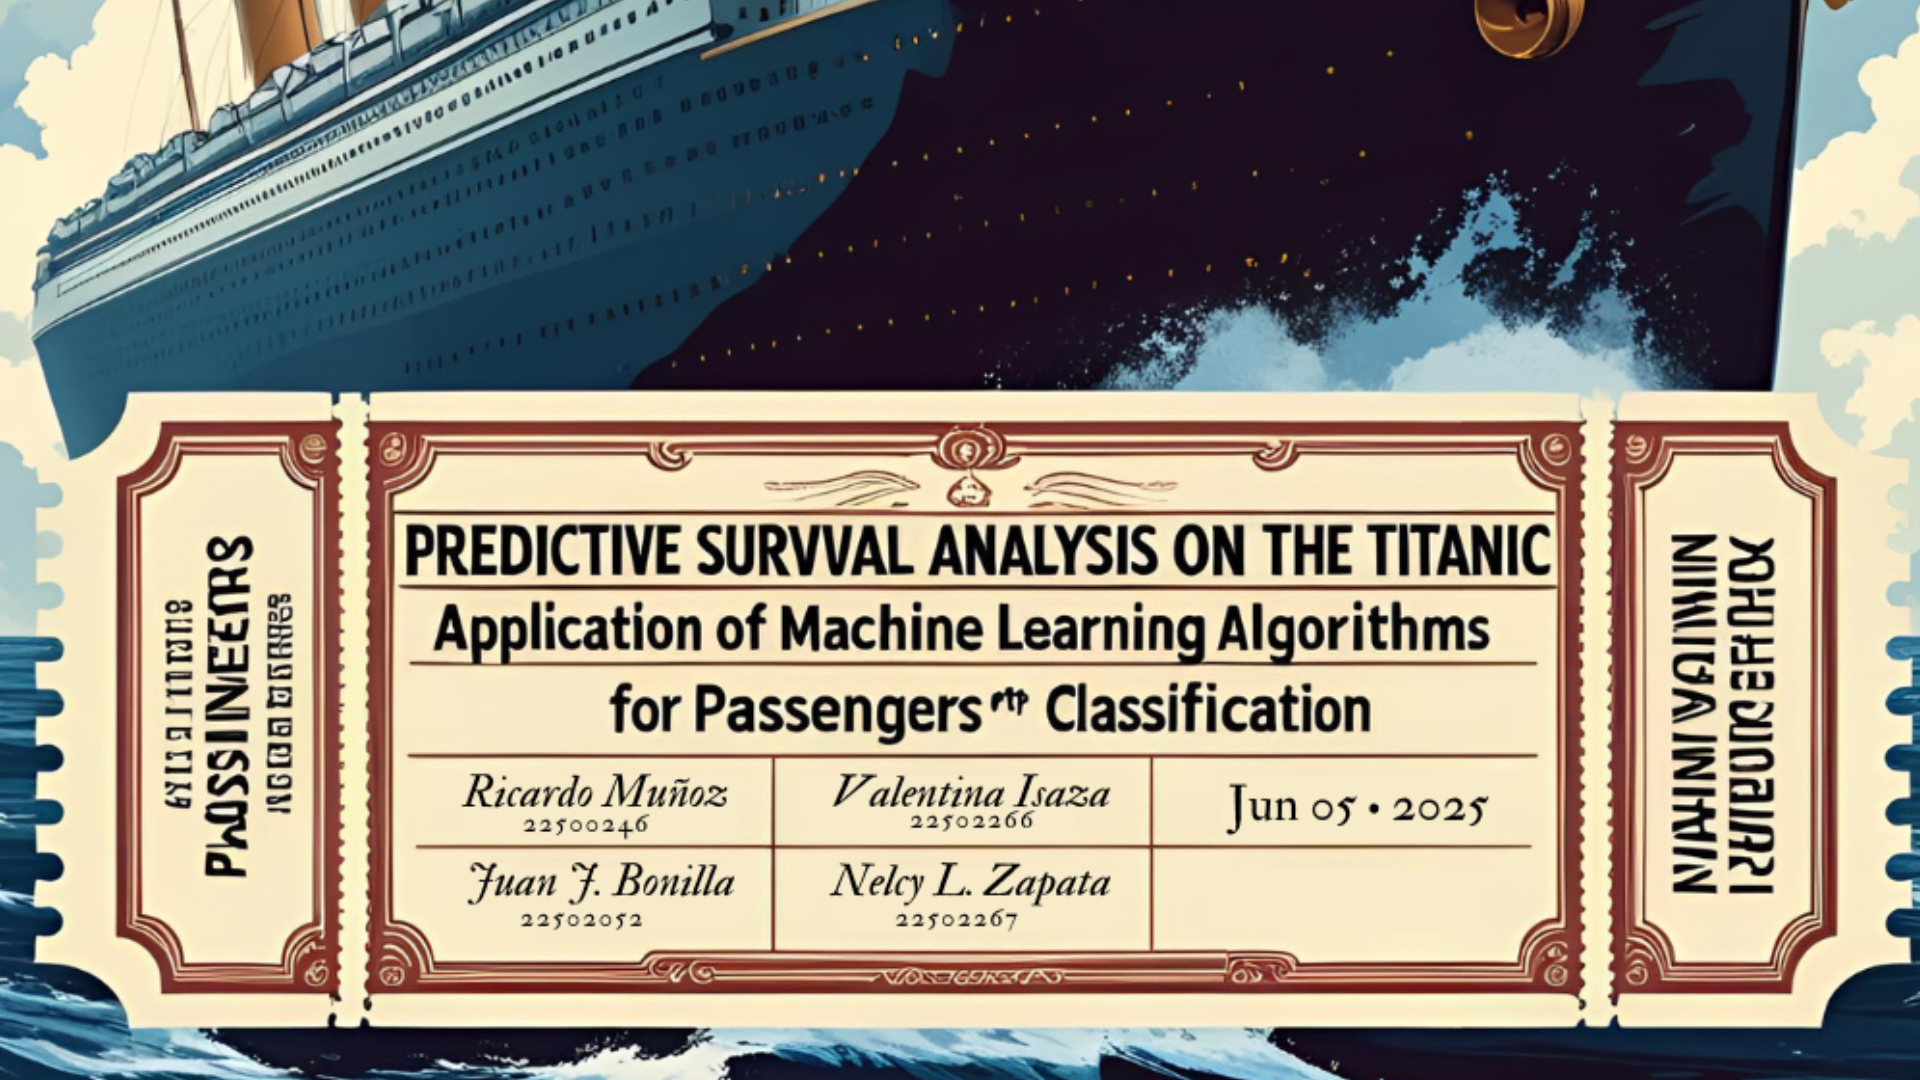

## ***1. Importar Librerias***

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency

## ***2. Carga de datos***

---



#### ***2.1 Importacion de dataset***

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = 'drive/MyDrive/Proyecto_ML/Data/titanic_training.csv'
path = '/content/drive/MyDrive/Colab Notebooks/APRENDIZAJE AUTOMATICO//ENTREGA 1 - PROYECTO/Proyecto_ML/Data/titanic_training.csv'
titanic_df = pd.read_csv(path)

#### ***2.2 Explicación de dataset***

En la noche entre el 14 y 15 de abril de 1912 cuando el RMS titanic hacía su viaje inaugutal entre South HAmpton y Nueva Escocia, sufrío una colisión con un Iceberg mientras el navío se desplazaba en el norte del Océano Atlántico. El impacto se dió en el lado derecho a las 12:40 P.M., lo que provocó su hundimiento en menos de tres horas.

Durante este suceso fallecieron 1502 personas de las 2224 conformadas por pasajeros y tripulación. Desafortunadamente la embarcación no contaba con suficientes botes salvavidas para todos sus ocupantes. Si bien la suerte puede ser un factor a considerar en la supervivenca de estas personas, también pueden haber grupos específicos de peronas que hayan tenido más probabilidades de hacerlo debido a sus características o condiciones.

En este conjunto de datos, se presentan algunas caracaterísticas y condiciones de las personas que se encontraban en el Titanic en el momento de su hundimiento y además una etiqueta que indica si bobrevivieron o no. A continuación se presentan más a detalle estos atributos:


| Variable  | Descripción                                   | Valores                                      |
|-----------|---------------------------------------------|------------------------------------------|
| survival  | Sobrevivió?                                   | 0 = No, 1 = Sí                         |
| pclass    | Clase del boleto de embarque                               | 1 = primera, 2 = segunda, 3 = tercera              |
| sex       | Sexo                                       | male = Masculino, female = Femenino                                        |
| age       | Edad en años                              |                                         |
| sibsp     | Cantidad de hermanos o esposas del sujeto a bordo |                                         |
| parch     | Cantidad de padres o hijos del sujeto a bordo Titanic |                                         |
| ticket    | Número de pase de abordaje                             |                                         |
| fare      | Tarifa de embarque                            |                                         |
| cabin     | Número de habitación                              |                                         |
| embarked  | Puerto de embarque                       | C = Cherbourg, Q = Queenstown, S = Southampton |



## ***3. Exploración de los datos***

---



#### ***3.1 Info Dataframe***

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  999 non-null    float64
 1   pclass    999 non-null    float64
 2   sex       999 non-null    object 
 3   age       804 non-null    float64
 4   sibsp     999 non-null    float64
 5   parch     999 non-null    float64
 6   ticket    999 non-null    object 
 7   fare      998 non-null    float64
 8   cabin     227 non-null    object 
 9   embarked  997 non-null    object 
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [ ]:
titanic_df.dropna(subset=['survived'], inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  999 non-null    float64
 1   pclass    999 non-null    float64
 2   sex       999 non-null    object 
 3   age       804 non-null    float64
 4   sibsp     999 non-null    float64
 5   parch     999 non-null    float64
 6   ticket    999 non-null    object 
 7   fare      998 non-null    float64
 8   cabin     227 non-null    object 
 9   embarked  997 non-null    object 
dtypes: float64(6), object(4)
memory usage: 85.9+ KB


#### ***3.2 Tabla Dataframe***

Observamos que este set de datos tiene 1000 registros, teniendo datos en todas las columns, las columnas de edad (age), trifa (fare), número de habitación (cabin) y puerto de embarque (embarked) tienen una mayor cantidad. Por el momento, procedemos a descartar el registro con nulo en la columna survived porque es la clasificación   que deseamos predecir.

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Define la función de estilo
def style_dataframe_blue_alternating_rows(df):
    """
    Aplica un estilo con tonalidades azul oscuro y filas alternas en gris
    a un DataFrame de pandas.
    """
    header_bg_color = '#34627e'
    header_text_color = '#FFFFFF'
    border_color = '#34495E'
    text_color = '#000000'
    even_row_color = '#bcd2de'
    odd_row_color = '#FFFFFF'

    # Aplicar los estilos
    return df.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if (i % 2 == 0) else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
                           'color': text_color,
                           'border-color': border_color,
                           'text-align': 'center'}) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase'),
                       ('text-align', 'center')
                       ]},
            {'selector': 'td',
             'props': [('border-color', border_color),
                       ('text-align', 'center')]}
        ]) \
        .set_caption("Información del DataFrame")

# --- Creación MANUAL del DataFrame con la información de info() ---
data_info_manual = {
    'Columna': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'sex_encoded', 'embarked_encoded', 'cabin_encoded'],
    'Recuento No Nulo': [999, 999, 999, 804, 999, 999, 999, 998, 227, 997, 999, 997, 227],
    'Tipo de Dato (Dtype)': ['float64', 'float64', 'object', 'float64', 'float64', 'float64', 'object', 'float64', 'object', 'object', 'float64', 'float64', 'float64']
}

info_df_manual = pd.DataFrame(data_info_manual)

# --- Aplicar el estilo al DataFrame creado manualmente y mostrarlo ---

styled_info_table_manual = style_dataframe_blue_alternating_rows(info_df_manual)
display(HTML(styled_info_table_manual.to_html()))


,Columna,Recuento No Nulo,Tipo de Dato (Dtype)
0,survived,999,float64
1,pclass,999,float64
2,sex,999,object
3,age,804,float64
4,sibsp,999,float64
5,parch,999,float64
6,ticket,999,object
7,fare,998,float64
8,cabin,227,object
9,embarked,997,object


Para tener una mejor visualización de las variables, codificamos las columnas categoricas que contienen texto exceptuando la del número de boleto de embarque (ticket).

In [ ]:
# Create a copy of the original columns
titanic_df['sex_encoded'] = titanic_df['sex']
titanic_df['embarked_encoded'] = titanic_df['embarked']
titanic_df['cabin_encoded'] = titanic_df['cabin']

# Create the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the selected columns
columns_to_encode = ['sex_encoded', 'embarked_encoded', 'cabin_encoded']
titanic_df[columns_to_encode] = ordinal_encoder.fit_transform(titanic_df[columns_to_encode])


In [ ]:
import pandas as pd
from IPython.display import display

# Define una función para aplicar el estilo con tonalidades
def style_dataframe_blue_alternating_rows(df):

    header_bg_color = '#34627e' # Un azul un poco más claro para los encabezados
    header_text_color = '#FFFFFF' # Blanco para el texto del encabezado
    border_color = '#34495E' # Un azul intermedio para los bordes
    text_color = '#000000' # Blanco para el texto general
    even_row_color = '#bcd2de' # Tono de gris para filas pares
    odd_row_color = '#FFFFFF'  # Tono de gris diferente para filas impares

    # Aplica los estilos
    return df.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if (i % 2 == 0) else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
                           'color': text_color,
                           'border-color': border_color}) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),        # Establece el texto en negrilla
                       ('font-style', 'italic'),      # Establece el texto en cursiva
                       ('text-transform', 'uppercase') # Transforma el texto a mayúscula
                       ]},
            {'selector': 'td',
             'props': [('border-color', border_color)]}
        ]) \
        .set_caption("Primeras filas del DataFrame Titanic")

# Aplica el estilo al head() del DataFrame y lo muestra
display(style_dataframe_blue_alternating_rows(titanic_df.head()))

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sex_encoded,embarked_encoded,cabin_encoded
0,0.000000,3.000000,male,nan,0.000000,0.000000,SOTON/OQ 392086,8.050000,nan,S,1.000000,2.000000,nan
1,0.000000,1.000000,male,22.000000,0.000000,0.000000,PC 17760,135.633300,nan,C,1.000000,0.000000,nan
2,0.000000,2.000000,male,23.000000,0.000000,0.000000,SC/PARIS 2133,15.045800,nan,C,1.000000,0.000000,nan
3,0.000000,2.000000,male,42.000000,0.000000,0.000000,211535,13.000000,nan,S,1.000000,2.000000,nan
4,0.000000,3.000000,male,20.000000,0.000000,0.000000,7534,9.845800,nan,S,1.000000,2.000000,nan


In [ ]:
import pandas as pd
from IPython.display import display

# Función para aplicar estilo personalizado con tonos azules
def style_dataframe_blue_alternating_rows(df):
    header_bg_color = '#34627e'  # Azul para encabezado
    header_text_color = '#FFFFFF'  # Blanco en encabezado
    border_color = '#34495E'  # Bordes azul intermedio
    text_color = '#000000'  # Texto negro
    even_row_color = '#bcd2de'  # Azul claro filas pares
    odd_row_color = '#FFFFFF'  # Blanco filas impares

    # Aplicar estilos
    return df.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if (i % 2 == 0) else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
            'color': text_color,
            'border-color': border_color
        }) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase')
                       ]},
            {'selector': 'td',
             'props': [('border-color', border_color)]}
        ]) \
        .set_caption("Estadísticas Descriptivas del DataFrame Titanic")

# Mostrar el describe() con estilo
display(style_dataframe_blue_alternating_rows(titanic_df.describe()))

,survived,pclass,age,sibsp,parch,fare,sex_encoded,embarked_encoded,cabin_encoded
count,999.000000,999.000000,804.000000,999.000000,999.000000,998.000000,999.000000,997.000000,227.000000
mean,0.386386,2.287287,30.259432,0.504505,0.409409,34.622386,0.650651,1.517553,78.193833
std,0.487165,0.843785,14.633917,1.058286,0.897308,54.390311,0.477003,0.800942,43.058895
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,1.000000,42.500000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300,1.000000,2.000000,78.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,32.115600,1.000000,2.000000,113.500000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,2.000000,152.000000


Ahora verificamos cómo se comportan por pares las variables.


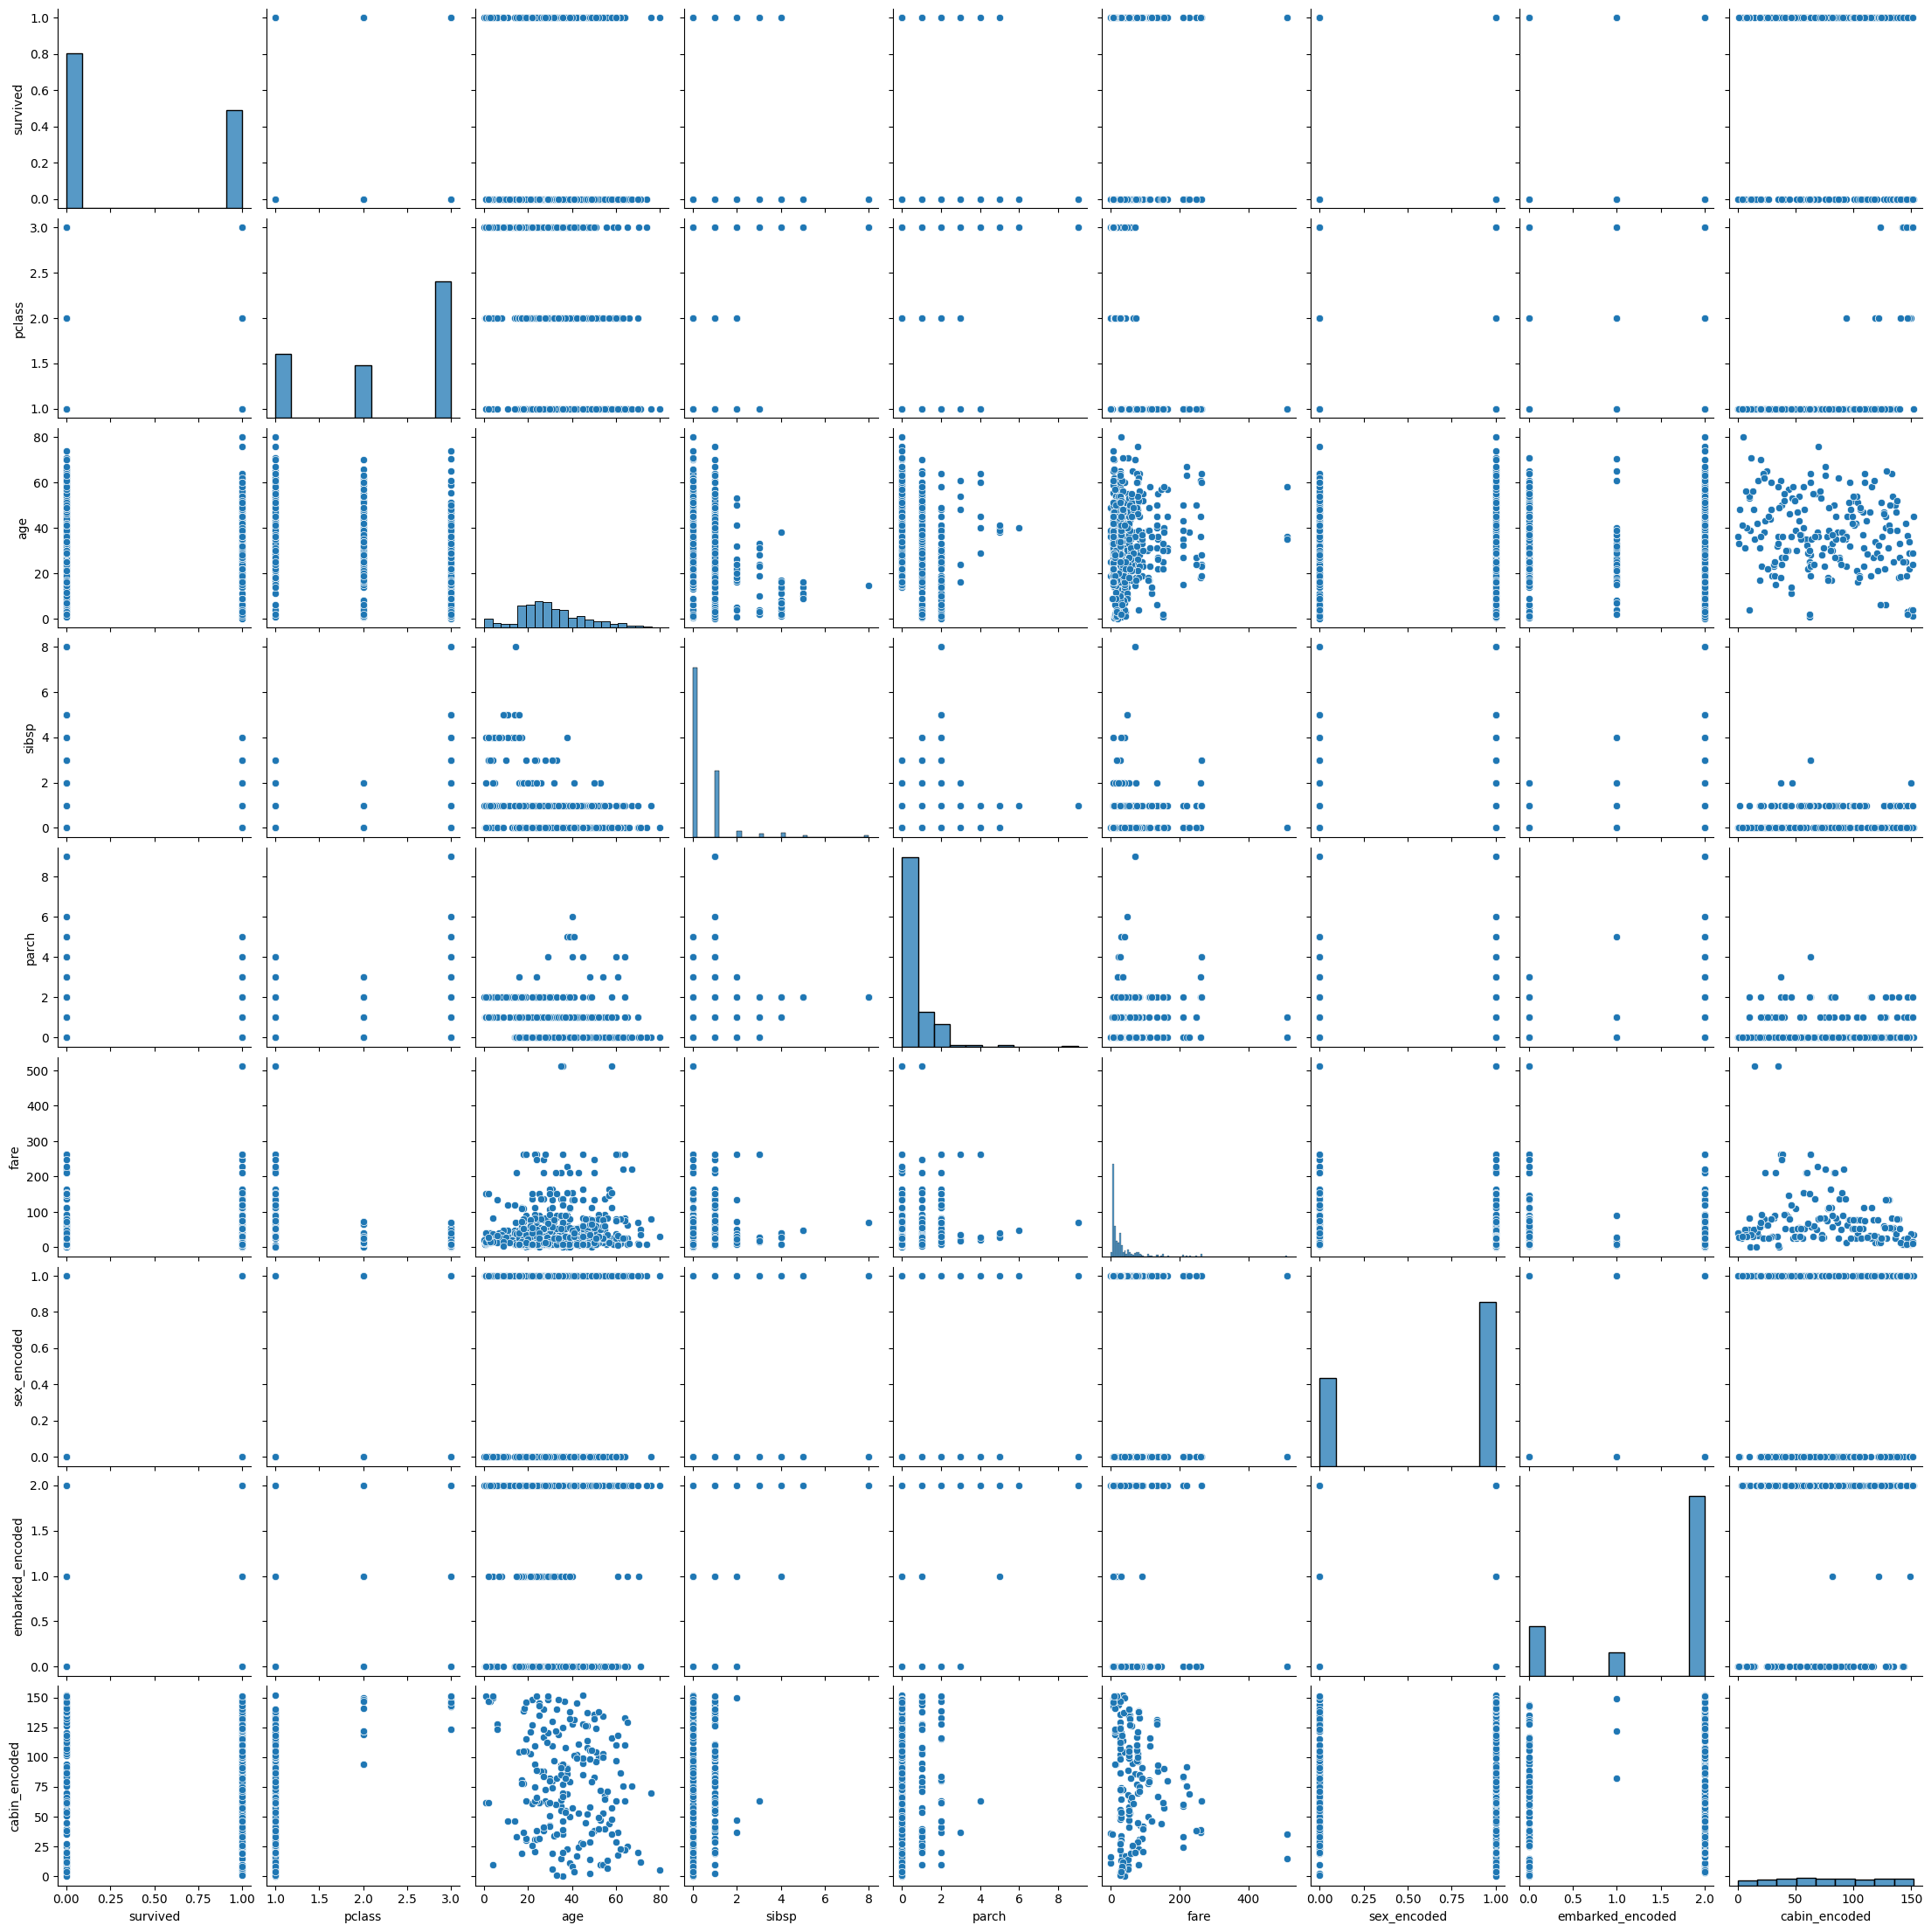

In [ ]:
sns.pairplot(titanic_df)

#### ***3.3 Análisis de Correlación Point-Biserial y Coeficientes de Cramer***

Para ver si hay correlación entre las variables continuas o con una cantidad considerable de valores únicos ('age', 'fare', 'cabin_encoded') y survived, usaremos la correlación de [bipunto serial](https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient) (valores entre -1 y 1, siendo los extremos una asociación alta y 0 nada de asociación). Sin embargo esta correlación no admite nulos (al menos en el modulo de scipy), así que procedemos a crear un nuevo dataframe nuevo en el que les damos manejo y así poder realizar la correlación. La edad y el lugar de embarque, los llenamos con la moda (no habían endades decimales), el valor del tiquete con la media y para el número de habitación creamos un nuevo valor 'Unknown', que puede hacer referencia a las habitaciones compartidas con otros pasajeros o familias en la sque se quedaban los pasajeros de tercera clase.

In [ ]:
# Create a copy of the DataFrame
titanic_df_copy = titanic_df.copy()

# Fill null values in 'fare' with the mean
titanic_df_copy['fare'] = titanic_df_copy['fare'].fillna(titanic_df_copy['fare'].mean())

# Create a new cabin value (e.g., 'Unknown') and fill nulls
new_cabin_value = 'Unknown'
titanic_df_copy['cabin'] = titanic_df_copy['cabin'].fillna(new_cabin_value)

# Fill nulls in 'embarked' with the mode
embarked_mode = titanic_df_copy['embarked'].mode()[0]
titanic_df_copy['embarked'] = titanic_df_copy['embarked'].fillna(embarked_mode)

# Fill nulls in 'age' with the mode
age_mode = titanic_df_copy['age'].mode()[0]
titanic_df_copy['age'] = titanic_df_copy['age'].fillna(age_mode)


# Create a copy of the original columns
titanic_df_copy['sex_encoded'] = titanic_df_copy['sex']
titanic_df_copy['embarked_encoded'] = titanic_df_copy['embarked']
titanic_df_copy['cabin_encoded'] = titanic_df_copy['cabin']

# Create the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the selected columns
columns_to_encode = ['sex_encoded', 'embarked_encoded', 'cabin_encoded']
titanic_df_copy[columns_to_encode] = ordinal_encoder.fit_transform(titanic_df_copy[columns_to_encode])


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
from IPython.display import display

# Función de estilo mejorada
def style_dataframe_exact_centered(df, caption=""):
    header_bg_color = '#34627e'
    header_text_color = '#FFFFFF'
    border_color = '#34495E'
    text_color = '#000000'
    even_row_color = '#bcd2de'
    odd_row_color = '#FFFFFF'

    # Convertimos todos los valores a string para evitar redondeos
    df_str = df.astype(str)

    return df_str.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if i % 2 == 0 else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
            'color': text_color,
            'border-color': border_color,
            'text-align': 'center',
            'font-family': 'monospace'
        }) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase'),
                       ('text-align', 'center')]},  # Centrado para headers
            {'selector': 'td',
             'props': [('border-color', border_color),
                       ('text-align', 'center')]},  # Centrado para celdas
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                       ('text-align', 'center'),
                       ('font-weight', 'bold'),
                       ('font-size', '16px'),
                       ('color', '#2c3e50')]}
        ]) \
        .set_caption(caption)

# Correlaciones
categorical_cols = ['survived', 'age', 'fare', 'cabin_encoded']
cat_cols = len(categorical_cols)
coef_matrix = np.zeros((cat_cols, cat_cols))
p_matrix = np.zeros((cat_cols, cat_cols))

for i in range(cat_cols):
    for j in range(i + 1, cat_cols):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        try:
            if len(titanic_df_copy[col1].unique()) > 1 and len(titanic_df_copy[col2].unique()) > 1:
                coef, p = pointbiserialr(titanic_df_copy[col1], titanic_df_copy[col2])
                coef_matrix[i, j] = coef
                p_matrix[i, j] = p
            else:
                coef_matrix[i, j] = 0
                p_matrix[i, j] = 1
        except (ValueError, TypeError):
            coef_matrix[i, j] = 0
            p_matrix[i, j] = 1

# DataFrames
coef_df = pd.DataFrame(coef_matrix, index=categorical_cols, columns=categorical_cols)
p_df = pd.DataFrame(p_matrix, index=categorical_cols, columns=categorical_cols)

# Mostrar con estilo centrado
display(style_dataframe_exact_centered(coef_df, caption="Matriz de Coeficientes de Correlación Punto-Biserial"))
display(style_dataframe_exact_centered(p_df, caption="Matriz de P-valores de la Correlación"))


,survived,age,fare,cabin_encoded
survived,0.0,-0.03336994626581996,0.2305416921370609,-0.24139402358839251
age,0.0,0.0,0.20438366158257093,-0.3220532412248875
fare,0.0,0.0,0.0,-0.5247103350003695
cabin_encoded,0.0,0.0,0.0,0.0


,survived,age,fare,cabin_encoded
survived,0.0,0.29202231693426767,1.6165821799939864e-13,1.0352868611819592e-14
age,0.0,0.0,6.992812567481409e-11,1.5292454004482595e-25
fare,0.0,0.0,0.0,9.205894969040015e-72
cabin_encoded,0.0,0.0,0.0,0.0


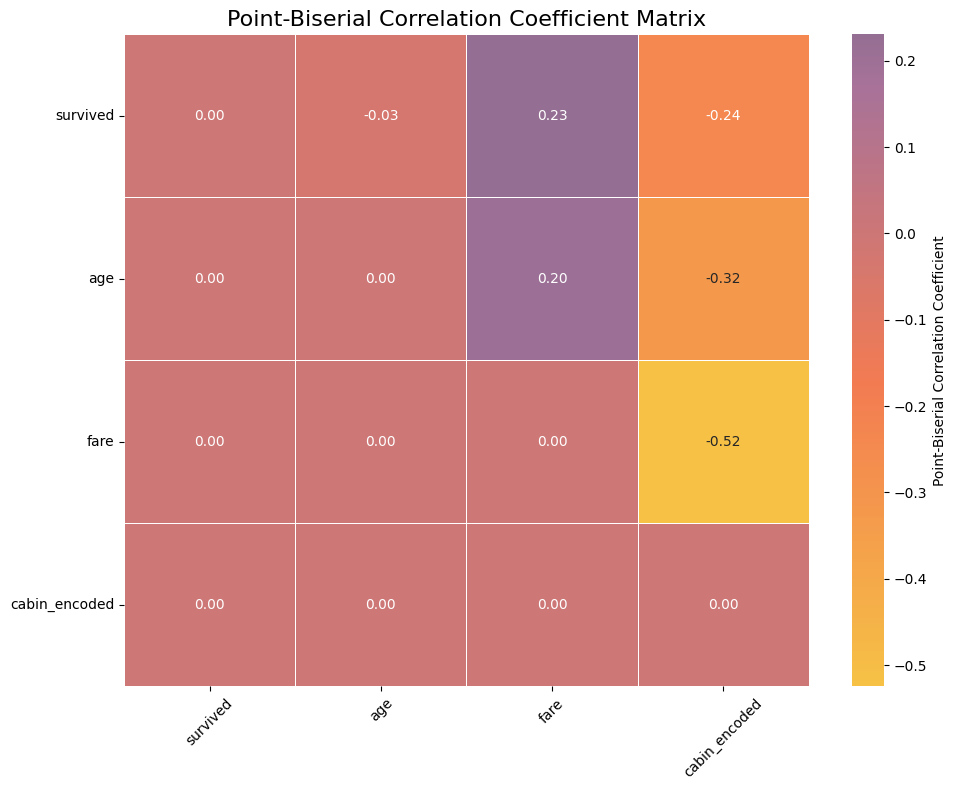

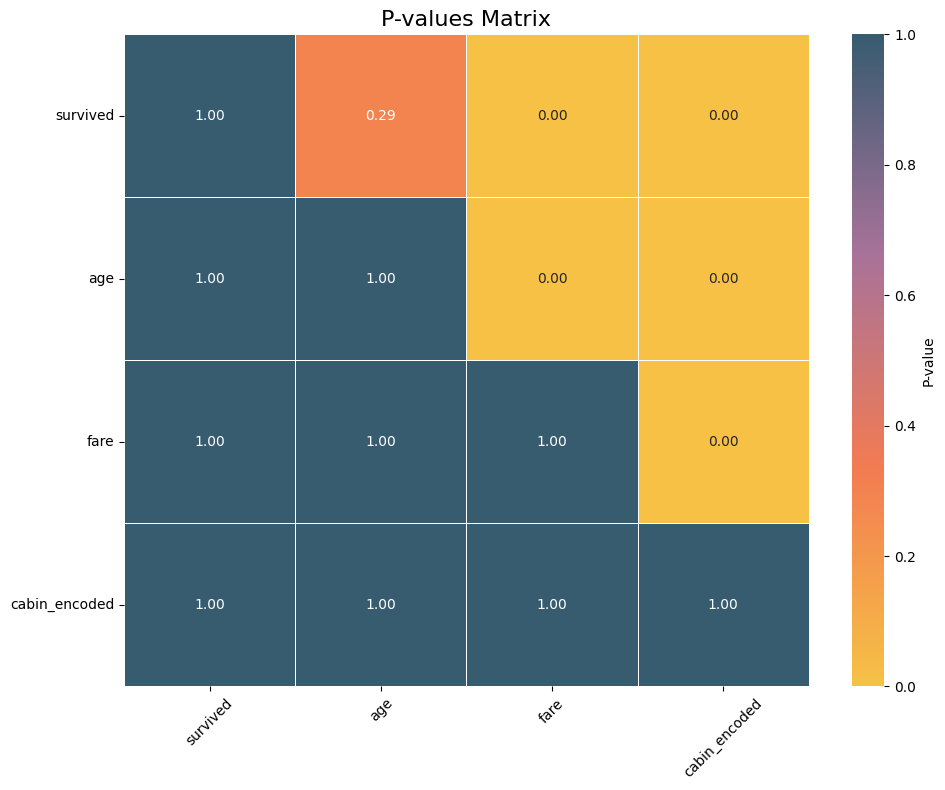

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas categóricas / binarias o continuas para evaluar
categorical_cols = ['survived', 'age', 'fare', 'cabin_encoded']
cat_cols = len(categorical_cols)

# Inicializar matrices
coef_matrix = np.zeros((cat_cols, cat_cols))
p_matrix = np.ones((cat_cols, cat_cols))  # P-vals inicializados en 1 (sin correlación significativa)

# Calcular coeficientes y p-valores solo una vez por par (matriz triangular superior)
for i in range(cat_cols):
    for j in range(i + 1, cat_cols):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        try:
            if len(titanic_df_copy[col1].unique()) > 1 and len(titanic_df_copy[col2].unique()) > 1:
                coef, p = pointbiserialr(titanic_df_copy[col1], titanic_df_copy[col2])
                coef_matrix[i, j] = coef
                p_matrix[i, j] = p
        except (ValueError, TypeError):
            continue

# Convertir a DataFrames para visualización
coef_df = pd.DataFrame(coef_matrix, index=categorical_cols, columns=categorical_cols)
p_df = pd.DataFrame(p_matrix, index=categorical_cols, columns=categorical_cols)

# Define la paleta personalizada
custom_palette = ['#f6c145', '#f37b52', '#a7729a', '#375b6f']

# Crear un color map con seaborn usando la paleta
from matplotlib.colors import LinearSegmentedColormap
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)

# Graficar coeficientes de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(coef_df, annot=True, cmap=cmap_custom, center=0, linewidths=0.5, fmt='.2f',
            cbar_kws={'label': 'Point-Biserial Correlation Coefficient'})
plt.title("Point-Biserial Correlation Coefficient Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Graficar p-valores
plt.figure(figsize=(10, 8))
sns.heatmap(p_df, annot=True, cmap=cmap_custom, center=0.5, linewidths=0.5, fmt='.2f',
            cbar_kws={'label': 'P-value'})
plt.title("P-values Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Ahora miramos la correlación entre las variables categóricas ('pclass', 'sibsp', 'sex_encoded', 'embarked_encoded') y survived. Para esto utilizamos el [coeficiente de Crámer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) (valores entre 0 y 1, siendo 0 nada de asociación y 1 asociación perfecta).

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from IPython.display import display

# Función de estilo exacta con centrado y sin redondeo
def style_dataframe_exact_centered(df, caption=""):
    header_bg_color = '#34627e'
    header_text_color = '#FFFFFF'
    border_color = '#34495E'
    text_color = '#000000'
    even_row_color = '#bcd2de'
    odd_row_color = '#FFFFFF'

    df_str = df.astype(str)

    return df_str.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if i % 2 == 0 else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
            'color': text_color,
            'border-color': border_color,
            'text-align': 'center',
            'font-family': 'monospace'
        }) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase'),
                       ('text-align', 'center')]},
            {'selector': 'td',
             'props': [('border-color', border_color),
                       ('text-align', 'center')]},
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                       ('text-align', 'center'),
                       ('font-weight', 'bold'),
                       ('font-size', '16px'),
                       ('color', '#2c3e50')]}
        ]) \
        .set_caption(caption)

# Función para calcular Cramér's V corregido
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variables categóricas
categorical_cols = ['survived', 'pclass', 'sibsp', 'parch', 'sex_encoded', 'embarked_encoded']
cat_cols = len(categorical_cols)

# Inicializar matrices
coef_matrix = np.zeros((cat_cols, cat_cols))
p_matrix = np.zeros((cat_cols, cat_cols))

# Calcular Cramér's V y p-valores
for i in range(cat_cols):
    for j in range(i + 1, cat_cols):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        try:
            if len(titanic_df_copy[col1].unique()) > 1 and len(titanic_df_copy[col2].unique()) > 1:
                coef = cramers_v(titanic_df_copy[col1], titanic_df_copy[col2])
                coef_matrix[i, j] = coef

                confusion_matrix = pd.crosstab(titanic_df_copy[col1], titanic_df_copy[col2])
                p_value = chi2_contingency(confusion_matrix)[1]
                p_matrix[i, j] = p_value
            else:
                coef_matrix[i, j] = 0
                p_matrix[i, j] = 1
        except (ValueError, TypeError):
            coef_matrix[i, j] = 0
            p_matrix[i, j] = 1

# Crear DataFrames
coef_df = pd.DataFrame(coef_matrix, index=categorical_cols, columns=categorical_cols)
p_df = pd.DataFrame(p_matrix, index=categorical_cols, columns=categorical_cols)

# Mostrar con estilo centrado
display(style_dataframe_exact_centered(coef_df, caption="Matriz de Coeficientes Cramér's V"))
display(style_dataframe_exact_centered(p_df, caption="Matriz de P-valores para Cramér's V"))

,survived,pclass,sibsp,parch,sex_encoded,embarked_encoded
survived,0.0,0.3063572241904871,0.1765509558834534,0.18693715369275368,0.5454667109974249,0.16380769962337963
pclass,0.0,0.0,0.16933840735359593,0.02935726957786088,0.11786862576457555,0.2612180234207776
sibsp,0.0,0.0,0.0,0.23426980509958228,0.19505170324390325,0.11247004393602983
parch,0.0,0.0,0.0,0.0,0.2338453295365432,0.08248882754518795
sex_encoded,0.0,0.0,0.0,0.0,0.0,0.11630090542133831
embarked_encoded,0.0,0.0,0.0,0.0,0.0,0.0


,survived,pclass,sibsp,parch,sex_encoded,embarked_encoded
survived,0.0,1.6817119833342686e-21,1.6731277750770014e-06,5.477775309189437e-07,9.261365081653609e-67,5.626338215776431e-07
pclass,0.0,0.0,4.537382539142497e-10,0.32997844564301104,0.00035849046311940203,2.734859269089881e-29
sibsp,0.0,0.0,0.0,7.085124498968354e-54,7.4767806871436e-08,0.0002046157057099418
parch,0.0,0.0,0.0,0.0,7.291051662595395e-11,0.016157948288278306
sex_encoded,0.0,0.0,0.0,0.0,0.0,0.00043056182694369065
embarked_encoded,0.0,0.0,0.0,0.0,0.0,0.0


Con los resultados de nuestros coeficientes de asociación, podíamos decir que las variables que podrían ayudarnos a discriminar si una persona sobrevivió o on al accidente del titanic, se organizan en orden descendente de importancia como se muestra a continuación:

- Sexo
- Clase del boleto
- Tarifa de viaje
- Habitación (Está muy asociada a la tarifa de viaje debido a que las habitaciones se organizaban en las secciones A, B, C, D y E, siendo la A la más costosa y la E la menos costosa. Se escogió el codificador ordinal para mantener de alguna forma este comportamiento).
- Cantidad de padres o hijos a bordo.
- Cantidad de hemanos o cónyugues a bordo.
-Lugar de donde embarcó el pasajero.
-Edad (Este es un caso especial porque el valor P del coeficiente de asociación es bastante alto, así que a futuro podríamos probar incluyendola y quitándola para ver qué resultados obtenemos).

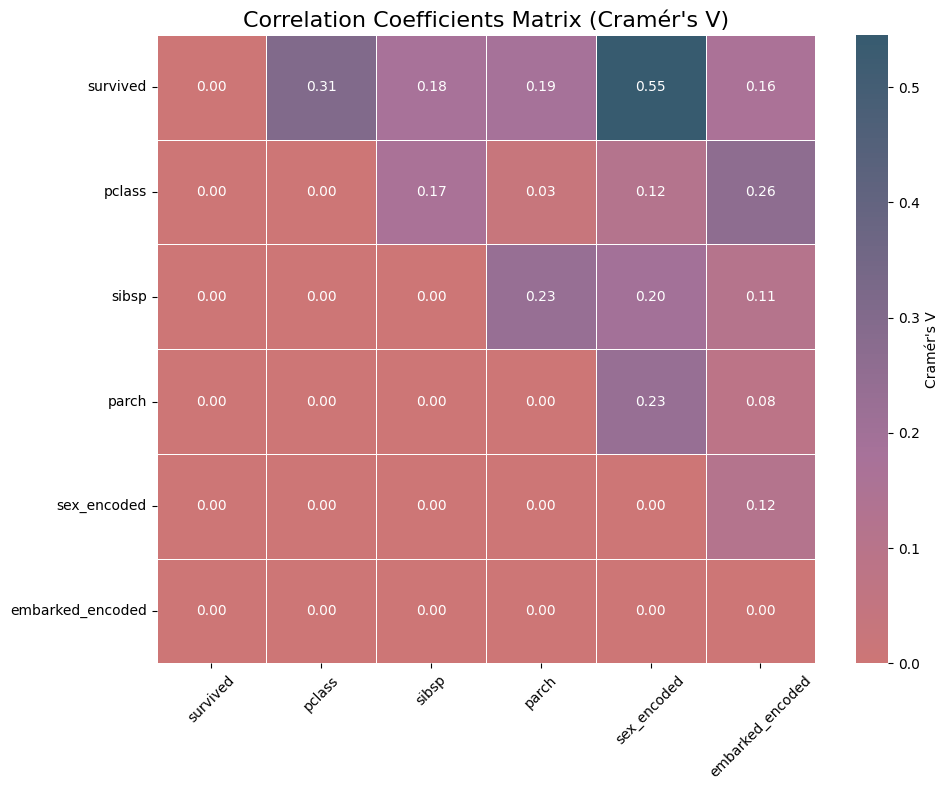

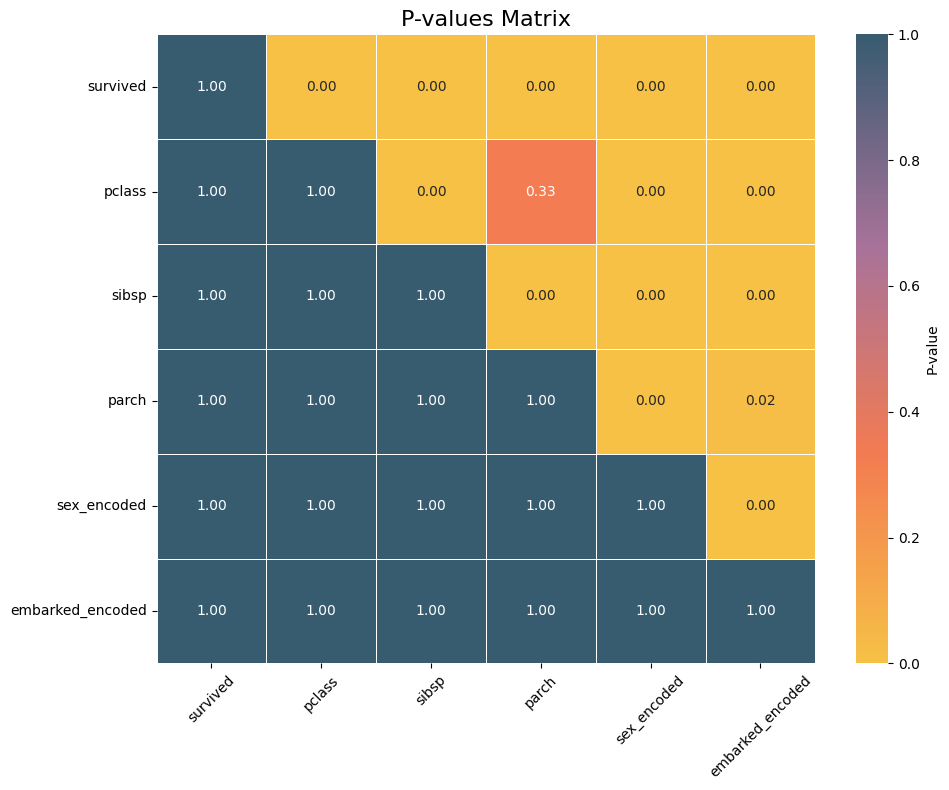

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define paleta personalizada
custom_palette = ['#f6c145', '#f37b52', '#a7729a', '#375b6f']
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)

# Define la función de Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Columnas categóricas
categorical_cols = ['survived', 'pclass', 'sibsp', 'parch', 'sex_encoded', 'embarked_encoded']
cat_cols = len(categorical_cols)

# Inicializar matrices
coef_matrix = np.zeros((cat_cols, cat_cols))
p_matrix = np.ones((cat_cols, cat_cols))  # Por defecto p-vals en 1 (sin significancia)

# Calcular coeficientes y p-valores
for i in range(cat_cols):
    for j in range(i + 1, cat_cols):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        try:
            if len(titanic_df_copy[col1].unique()) > 1 and len(titanic_df_copy[col2].unique()) > 1:
                coef = cramers_v(titanic_df_copy[col1], titanic_df_copy[col2])
                coef_matrix[i, j] = coef

                confusion_matrix = pd.crosstab(titanic_df_copy[col1], titanic_df_copy[col2])
                p_value = chi2_contingency(confusion_matrix)[1]
                p_matrix[i, j] = p_value
        except (ValueError, TypeError):
            continue

# Convertir a DataFrames
coef_df = pd.DataFrame(coef_matrix, index=categorical_cols, columns=categorical_cols)
p_df = pd.DataFrame(p_matrix, index=categorical_cols, columns=categorical_cols)

# Graficar matriz de Cramér's V
plt.figure(figsize=(10, 8))
sns.heatmap(coef_df, annot=True, cmap=cmap_custom, center=0, linewidths=0.5, fmt='.2f',
            cbar_kws={'label': "Cramér's V"})
plt.title("Correlation Coefficients Matrix (Cramér's V)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Graficar matriz de p-valores
plt.figure(figsize=(10, 8))
sns.heatmap(p_df, annot=True, cmap=cmap_custom, center=0.5, linewidths=0.5, fmt='.2f',
            cbar_kws={'label': 'P-value'})
plt.title("P-values Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## ***4. Implementacion Modelos Supervisados***

---




#### ***4.1 Regresión Logística***

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd # Importamos pandas para trabajar con DataFrames y mostrar la tabla de coeficientes

# Seleccionar las características (variables independientes)
# Elegimos las columnas que creemos que pueden ayudar a predecir la supervivencia
features = ['sex_encoded', 'pclass', 'fare', 'cabin_encoded', 'parch', 'sibsp', 'age']

# Seleccionar la variable objetivo (la variable que queremos predecir)
target = 'survived'

# Crear los conjuntos de datos para las características (X) y la variable objetivo (y)
X = titanic_df_copy[features]
y = titanic_df_copy[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 significa que el 20% de los datos se usarán para probar
# random_state=42 asegura que la división sea la misma cada vez que se ejecuta el código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Creación y entrenamiento del modelo de Regresión Logística ---

# Crear una instancia del modelo de Regresión Logística
# max_iter=1000: Aumentamos el número máximo de iteraciones para ayudar a la convergencia del algoritmo de optimización
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo utilizando los datos de entrenamiento
# El modelo aprende los pesos óptimos para cada característica
model.fit(X_train, y_train)

# --- Evaluación del modelo ---

# Hacer predicciones en el conjunto de prueba
# Usamos el modelo entrenado para predecir la supervivencia en datos que no ha visto antes
y_pred = model.predict(X_test)

# Calcular la exactitud (accuracy) del modelo
# La exactitud es la proporción de predicciones correctas sobre el total de predicciones
accuracy = accuracy_score(y_test, y_pred)

# Generar un reporte de clasificación como diccionario para facilitar el acceso a los valores
# Este reporte incluye métricas importantes como precisión, recall, F1-score y soporte
report_dict = classification_report(y_test, y_pred, output_dict=True)

# --- Imprimir los resultados en formato de tabla ---

print("--- Métricas de Evaluación del Modelo de Regresión Logística ---")
print("-" * 50)
print(f"{'Métrica':<25} | {'Valor':<10} | Descripción")
print("-" * 50)
print(f"{'Exactitud (Accuracy)':<25} | {accuracy:<10.4f} | Proporción de predicciones correctas.")
print("-" * 50)

print("\n--- Reporte de Clasificación ---")
print("-" * 60)
print(f"{'Clase':<15} | {'Precision':<10} | {'Recall':<10} | {'F1-score':<10} | {'Support':<10}")
print("-" * 60)

# Imprimir métricas por clase (0.0 y 1.0)
for label, metrics in report_dict.items():
    # Verificamos si la clave es numérica (corresponde a las clases)
    if str(label).replace('.', '', 1).isdigit():
         print(f"{str(label):<15} | {metrics['precision']:<10.2f} | {metrics['recall']:<10.2f} | {metrics['f1-score']:<10.2f} | {metrics['support']:<10}")


print("-" * 60)

# Imprimir métricas generales (macro avg y weighted avg)
print(f"{'macro avg':<15} | {report_dict['macro avg']['precision']:<10.2f} | {report_dict['macro avg']['recall']:<10.2f} | {report_dict['macro avg']['f1-score']:<10.2f} | {report_dict['macro avg']['support']:<10}")
print(f"{'weighted avg':<15} | {report_dict['weighted avg']['precision']:<10.2f} | {report_dict['weighted avg']['recall']:<10.2f} | {report_dict['weighted avg']['f1-score']:<10.2f} | {report_dict['weighted avg']['support']:<10}")
print("-" * 60)


print("\n--- Coeficientes del Modelo de Regresión Logística ---")
print("-" * 50)
print(f"{'Característica':<20} | {'Coeficiente':<15} | Interpretación")
print("-" * 50)

# Imprimir coeficientes de las características
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature:<20} | {coef:<15.4f} | ")

# Imprimir el intercepto
print(f"{'Intercepto':<20} | {model.intercept_[0]:<15.4f} | Valor base del log-odds.")
print("-" * 50)

# Guardar sus métricas:
metrics_run_original = {
        'Accuracy': accuracy,
        'Reporte (dict)': classification_report(y_test, y_pred, output_dict=True),
        'Mejores Hiperparámetros': 'N/A (Modelo básico)',
        'Mejor CV Score': 'N/A'
    }

--- Métricas de Evaluación del Modelo de Regresión Logística ---
--------------------------------------------------
Métrica                   | Valor      | Descripción
--------------------------------------------------
Exactitud (Accuracy)      | 0.7950     | Proporción de predicciones correctas.
--------------------------------------------------

--- Reporte de Clasificación ---
------------------------------------------------------------
Clase           | Precision  | Recall     | F1-score   | Support   
------------------------------------------------------------
0.0             | 0.84       | 0.84       | 0.84       | 129.0     
1.0             | 0.71       | 0.70       | 0.71       | 71.0      
------------------------------------------------------------
macro avg       | 0.78       | 0.77       | 0.78       | 200.0     
weighted avg    | 0.79       | 0.80       | 0.79       | 200.0     
------------------------------------------------------------

--- Coeficientes del Modelo de 

#### ***4.2 Modelo Random Forest***

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Importamos RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# --- Carga y Preparación de los datos ---
# Usaremos el mismo DataFrame original y preparación que en el bloque anterior para consistencia.
# Asumimos que `titanic_df` ya está cargado y con nulos en 'survived' eliminados globalmente.

# Creamos una copia para trabajar con ella y aplicar las mejoras de preprocesamiento
titanic_df_improved_rf = titanic_df.copy() # Usamos un nombre diferente para claridad

# --- Ingeniería de Características ---
titanic_df_improved_rf['family_size'] = titanic_df_improved_rf['sibsp'] + titanic_df_improved_rf['parch'] + 1

# --- Manejo de Datos Faltantes (para las columnas usadas en este modelo) ---
age_mode = titanic_df_improved_rf['age'].mode()[0]
titanic_df_improved_rf['age'] = titanic_df_improved_rf['age'].fillna(age_mode)

fare_mean = titanic_df_improved_rf['fare'].mean()
titanic_df_improved_rf['fare'] = titanic_df_improved_rf['fare'].fillna(fare_mean)

embarked_mode = titanic_df_improved_rf['embarked'].mode()[0]
titanic_df_improved_rf['embarked'] = titanic_df_improved_rf['embarked'].fillna(embarked_mode)

# Definir las columnas numéricas y categóricas para el preprocesamiento
numeric_features_rf = ['age', 'fare', 'family_size']
categorical_features_rf = ['pclass', 'sex', 'embarked'] # Usamos columnas originales antes de OneHotEncoder

# Definir las transformaciones para las columnas usando ColumnTransformer
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_rf), # Escalado para características numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_rf) # One-Hot Encoding para categóricas
    ],
    remainder='passthrough' # Mantener otras columnas (como 'survived') sin transformar
)

# Seleccionar las características (X) y la variable objetivo (y) para este modelo
features_list_rf = numeric_features_rf + categorical_features_rf
X_rf = titanic_df_improved_rf[features_list_rf]
y_rf = titanic_df_improved_rf[target] # 'target' definida en el bloque anterior

# Dividir los datos en conjuntos de entrenamiento y prueba
# IMPORTANTE: Usar el mismo random_state=42 para asegurar la misma división que el modelo original
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


# --- Creación del Pipeline del Modelo (con RandomForestClassifier) ---
# No usamos GridSearchCV en este bloque, solo el modelo con configuración por defecto (o especificada)
model_pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                               ('classifier', RandomForestClassifier(random_state=42))]) # Modelo Random Forest


# --- Entrenamiento del Modelo ---
print("Entrenando el modelo Random Forest (sin GridSearchCV)...")
model_pipeline_rf.fit(X_train_rf, y_train_rf)
print("Entrenamiento de Random Forest completado.")

# --- Evaluación del Modelo ---
y_pred_rf = model_pipeline_rf.predict(X_test_rf)

# Calcular la exactitud
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

# Obtener el reporte de clasificación (como diccionario para almacenar)
report_dict_rf = classification_report(y_test_rf, y_pred_rf, output_dict=True)

# --- Almacenar las métricas ---
metrics_run_random_forest = {
    'Accuracy': accuracy_rf,
    'Reporte (dict)': report_dict_rf,
    'Mejores Hiperparámetros': 'N/A (Random Forest sin GS)',
    'Mejor CV Score': 'N/A'
}

# --- Imprimir los resultados (opcional) ---
print("\n--- Resultados del Modelo Random Forest (sin GridSearchCV) ---")
print(f"Exactitud (Accuracy): {metrics_run_random_forest['Accuracy']:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test_rf, y_pred_rf)) # Imprimir el reporte formateado

Entrenando el modelo Random Forest (sin GridSearchCV)...
Entrenamiento de Random Forest completado.

--- Resultados del Modelo Random Forest (sin GridSearchCV) ---
Exactitud (Accuracy): 0.7900

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       129
         1.0       0.70      0.72      0.71        71

    accuracy                           0.79       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.79      0.79      0.79       200



#### ***4.3 Modelo XGBClassifier***

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Importamos XGBoost Classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Verificar si las variables de datos y preprocesador existen
try:
    X_train_rf, X_test_rf, y_train_rf, y_test_rf
    preprocessor_rf
except NameError:
    print("¡Error! Las variables de datos (X_train_rf, etc.) o el preprocessor_rf no están definidas.")
    print("Asegúrate de ejecutar la celda del modelo Random Forest antes de ejecutar esta.")
    pass

# --- Creación del Pipeline del Modelo (con XGBoost Classifier) ---
xgb_classifier = XGBClassifier(random_state=42)

# Crear el pipeline que incluye el preprocesamiento y el clasificador XGBoost
model_pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', xgb_classifier)
])

# --- Entrenamiento del Modelo ---
print("Entrenando el modelo XGBoost (sin GridSearchCV)...")
model_pipeline_xgb.fit(X_train_rf, y_train_rf)
print("Entrenamiento de XGBoost completado.")

# --- Evaluación del Modelo ---
y_pred_xgb = model_pipeline_xgb.predict(X_test_rf)

# Calcular la exactitud
accuracy_xgb = accuracy_score(y_test_rf, y_pred_xgb)

# Obtener el reporte de clasificación (como diccionario para almacenar)
report_dict_xgb = classification_report(y_test_rf, y_pred_xgb, output_dict=True)

# --- Almacenar las métricas ---
metrics_run_xgboost = {
    'Accuracy': accuracy_xgb,
    'Reporte (dict)': report_dict_xgb,
    'Mejores Hiperparámetros': 'N/A (XGBoost sin GS)',
    'Mejor CV Score': 'N/A'
}

# --- Imprimir los resultados ---
print("\n--- Resultados del Modelo XGBoost (sin GridSearchCV) ---")
print(f"Exactitud (Accuracy): {metrics_run_xgboost['Accuracy']:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test_rf, y_pred_xgb))

# --- Manejo de la variable all_results ---
# Crear all_results si no existe
if 'all_results' not in globals():
    all_results = {}

# Añadir resultados del modelo XGBoost
all_results['XGBoost (sin GS)'] = metrics_run_xgboost


Entrenando el modelo XGBoost (sin GridSearchCV)...
Entrenamiento de XGBoost completado.

--- Resultados del Modelo XGBoost (sin GridSearchCV) ---
Exactitud (Accuracy): 0.8050

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       129
         1.0       0.71      0.76      0.73        71

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.81      0.81      0.81       200



#### ***4.4 Modelo Support Vector Machine (SVM)***

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Importamos el clasificador Support Vector Machine
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Verificar si las variables de datos y preprocesador existen
try:
    X_train_rf, X_test_rf, y_train_rf, y_test_rf
    preprocessor_rf
except NameError:
    print("¡Error! Las variables de datos (X_train_rf, etc.) o el preprocessor_rf no están definidas.")
    print("Asegúrate de ejecutar la celda del modelo Random Forest antes de ejecutar esta.")
    pass

# --- Creación del Pipeline del Modelo (con SVM) ---
svm_classifier = SVC(random_state=42, probability=True)

# Crear el pipeline que incluye el preprocesamiento y el clasificador SVM
model_pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', svm_classifier)
])

# --- Entrenamiento del Modelo ---
print("Entrenando el modelo SVM...")
model_pipeline_svm.fit(X_train_rf, y_train_rf)
print("Entrenamiento de SVM completado.")

# --- Evaluación del Modelo ---
y_pred_svm = model_pipeline_svm.predict(X_test_rf)

# Calcular la exactitud
accuracy_svm = accuracy_score(y_test_rf, y_pred_svm)

# Obtener el reporte de clasificación (como diccionario para almacenar)
report_dict_svm = classification_report(y_test_rf, y_pred_svm, output_dict=True)

# --- Almacenar las métricas ---
metrics_run_svm = {
    'Accuracy': accuracy_svm,
    'Reporte (dict)': report_dict_svm,
    'Mejores Hiperparámetros': 'N/A (SVM sin GS)',
    'Mejor CV Score': 'N/A'
}

# --- Imprimir los resultados ---
print("\n--- Resultados del Modelo SVM (sin GridSearchCV) ---")
print(f"Exactitud (Accuracy): {metrics_run_svm['Accuracy']:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test_rf, y_pred_svm))

# --- Manejo de la variable all_results ---
# Crear all_results si no existe
if 'all_results' not in globals():
    all_results = {}

# Añadir resultados del modelo SVM
all_results['SVM (sin GS)'] = metrics_run_svm
print("\nResultados de SVM añadidos a 'all_results'. Ejecuta la celda de comparación si deseas verlos.")

Entrenando el modelo SVM...
Entrenamiento de SVM completado.

--- Resultados del Modelo SVM (sin GridSearchCV) ---
Exactitud (Accuracy): 0.8100

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       129
         1.0       0.76      0.68      0.72        71

    accuracy                           0.81       200
   macro avg       0.80      0.78      0.79       200
weighted avg       0.81      0.81      0.81       200


Resultados de SVM añadidos a 'all_results'. Ejecuta la celda de comparación si deseas verlos.


#### ***4.5 Modelo K-Nearest Neighbors (KNN)***

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Importamos el clasificador K-Nearest Neighbors
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# --- Reutilizar Preparación de los datos ---
# Verificar si las variables de datos y preprocesador existen
try:
    X_train_rf, X_test_rf, y_train_rf, y_test_rf
    preprocessor_rf
except NameError:
    print("¡Error! Las variables de datos (X_train_rf, etc.) o el preprocessor_rf no están definidas.")
    print("Asegúrate de ejecutar la celda del modelo Random Forest antes de ejecutar esta.")
    pass

# --- Creación del Pipeline del Modelo (con KNN) ---
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Crear el pipeline que incluye el preprocesamiento y el clasificador KNN
model_pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', knn_classifier)
])

# --- Entrenamiento del Modelo ---
print("Entrenando el modelo KNN...")
model_pipeline_knn.fit(X_train_rf, y_train_rf)
print("Entrenamiento de KNN completado.")

# --- Evaluación del Modelo ---
y_pred_knn = model_pipeline_knn.predict(X_test_rf)

# Calcular la exactitud
accuracy_knn = accuracy_score(y_test_rf, y_pred_knn)

# Obtener el reporte de clasificación (como diccionario para almacenar)
report_dict_knn = classification_report(y_test_rf, y_pred_knn, output_dict=True)

# --- Almacenar las métricas ---
metrics_run_knn = {
    'Accuracy': accuracy_knn,
    'Reporte (dict)': report_dict_knn,
    'Mejores Hiperparámetros': 'N/A (KNN sin GS)',
    'Mejor CV Score': 'N/A'
}

# --- Imprimir los resultados ---
print("\n--- Resultados del Modelo KNN (sin GridSearchCV) ---")
print(f"Exactitud (Accuracy): {metrics_run_knn['Accuracy']:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test_rf, y_pred_knn))

# --- Manejo de la variable all_results ---
# Crear all_results si no existe
if 'all_results' not in globals():
    all_results = {}

# Añadir resultados del modelo KNN
all_results['KNN (sin GS)'] = metrics_run_knn
print("\nResultados de KNN añadidos a 'all_results'. Ejecuta la celda de comparación si deseas verlos.")

Entrenando el modelo KNN...
Entrenamiento de KNN completado.

--- Resultados del Modelo KNN (sin GridSearchCV) ---
Exactitud (Accuracy): 0.7850

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       129
         1.0       0.71      0.68      0.69        71

    accuracy                           0.79       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.78      0.79      0.78       200


Resultados de KNN añadidos a 'all_results'. Ejecuta la celda de comparación si deseas verlos.


#### ***4.6 Modelo Gaussian Naive Bayes***

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Verificar si las variables de datos y preprocesador existen
try:
    X_train_rf, X_test_rf, y_train_rf, y_test_rf
    preprocessor_rf
except NameError:
    print("¡Error! Las variables de datos (X_train_rf, etc.) o el preprocessor_rf no están definidas.")
    print("Asegúrate de ejecutar la celda del modelo Random Forest (o cualquier celda que las defina) antes de ejecutar esta.")
    pass

# --- Creación del Pipeline del Modelo (con Gaussian Naive Bayes) ---
gaussian_nb_classifier = GaussianNB()

# Crear el pipeline que incluye el preprocesamiento y el clasificador
model_pipeline_gaussian_nb = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', gaussian_nb_classifier)
])

# --- Entrenamiento del Modelo ---
print("Entrenando el modelo Gaussian Naive Bayes...")
model_pipeline_gaussian_nb.fit(X_train_rf, y_train_rf)
print("Entrenamiento de Gaussian Naive Bayes completado.")

# --- Evaluación del Modelo ---
y_pred_gaussian_nb = model_pipeline_gaussian_nb.predict(X_test_rf)

# Calcular la exactitud
accuracy_gaussian_nb = accuracy_score(y_test_rf, y_pred_gaussian_nb)

# Obtener el reporte de clasificación
report_dict_gaussian_nb = classification_report(y_test_rf, y_pred_gaussian_nb, output_dict=True)

# --- Almacenar las métricas ---
metrics_run_gaussian_nb = {
    'Accuracy': accuracy_gaussian_nb,
    'Reporte (dict)': report_dict_gaussian_nb,
    'Mejores Hiperparámetros': 'N/A (Gaussian Naive Bayes sin GS)',
    'Mejor CV Score': 'N/A'
}

# --- Imprimir los resultados ---
print("\n--- Resultados del Modelo Gaussian Naive Bayes (sin GridSearchCV) ---")
print(f"Exactitud (Accuracy): {metrics_run_gaussian_nb['Accuracy']:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test_rf, y_pred_gaussian_nb))

# --- Manejo de la variable all_results ---
# Crear all_results si no existe
if 'all_results' not in globals():
    all_results = {}

# Añadir resultados del modelo
all_results['Gaussian Naive Bayes (sin GS)'] = metrics_run_gaussian_nb


Entrenando el modelo Gaussian Naive Bayes...
Entrenamiento de Gaussian Naive Bayes completado.

--- Resultados del Modelo Gaussian Naive Bayes (sin GridSearchCV) ---
Exactitud (Accuracy): 0.7800

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       129
         1.0       0.67      0.75      0.71        71

    accuracy                           0.78       200
   macro avg       0.76      0.77      0.77       200
weighted avg       0.79      0.78      0.78       200


Resultados de Gaussian Naive Bayes añadidos a 'all_results'. Ejecuta la celda de comparación si deseas verlos.


#### ***4.7 comparar los modelos***

In [ ]:
# Importar pandas para mostrar la tabla de comparación
import pandas as pd
from IPython.display import display  # Para mostrar DataFrames en Colab

# Función de estilo exacta con centrado y sin redondeo
def style_dataframe_exact_centered(df, caption=""):
    header_bg_color = '#34627e'
    header_text_color = '#FFFFFF'
    border_color = '#34495E'
    text_color = '#000000'
    even_row_color = '#bcd2de'
    odd_row_color = '#FFFFFF'

    df_str = df.astype(str)

    return df_str.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if i % 2 == 0 else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
            'color': text_color,
            'border-color': border_color,
            'text-align': 'center',
            'font-family': 'monospace'
        }) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase'),
                       ('text-align', 'center')]},
            {'selector': 'td',
             'props': [('border-color', border_color),
                       ('text-align', 'center')]},
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                       ('text-align', 'center'),
                       ('font-weight', 'bold'),
                       ('font-size', '16px'),
                       ('color', '#2c3e50')]},
        ]) \
        .set_caption(caption)

all_results = {
    'Regresión Logística Original': metrics_run_original,
    'Random Forest (sin GS)': metrics_run_random_forest,
    'XGBoost (sin GS)': metrics_run_xgboost,
    'SVM (sin GS)': metrics_run_svm,
    'KNN (sin GS)': metrics_run_knn,
    'Gaussian Naive Bayes (sin GS)': metrics_run_gaussian_nb  # <-- Agregar GaussianNB

}

# Preparar los datos para la tabla de comparación
comparison_data = []

for model_name, metrics in all_results.items():
    row = {'Modelo': model_name}
    # Verificar si las claves esperadas existen antes de acceder
    row['Exactitud (Test)'] = metrics.get('Accuracy', 'N/A')
    report = metrics.get('Reporte (dict)', {})

    row['Recall (Clase 1)'] = report.get('1.0', {}).get('recall', 'N/A')
    row['Precision (Clase 1)'] = report.get('1.0', {}).get('precision', 'N/A')
    row['F1-score (Clase 1)'] = report.get('1.0', {}).get('f1-score', 'N/A')
    row['Recall (Clase 0)'] = report.get('0.0', {}).get('recall', 'N/A')
    row['Precision (Clase 0)'] = report.get('0.0', {}).get('precision', 'N/A')
    row['F1-score (Clase 0)'] = report.get('0.0', {}).get('f1-score', 'N/A')

    comparison_data.append(row)

# Crear un DataFrame de pandas para mostrar la tabla
comparison_df = pd.DataFrame(comparison_data)

# Ordenar las columnas para una mejor visualización
ordered_columns = ['Modelo', 'Exactitud (Test)',
                   'Recall (Clase 1)', 'Precision (Clase 1)', 'F1-score (Clase 1)',
                   'Recall (Clase 0)', 'Precision (Clase 0)', 'F1-score (Clase 0)']
comparison_df = comparison_df[ordered_columns]

# Redondear valores numéricos para mejor presentación
for col in ordered_columns[1:]:
    comparison_df[col] = pd.to_numeric(comparison_df[col], errors='coerce').round(4)

# Imprimir la tabla de comparación con estilo
display(style_dataframe_exact_centered(comparison_df, caption="Comparación de Métricas de Evaluación por Modelo"))

,Modelo,Exactitud (Test),Recall (Clase 1),Precision (Clase 1),F1-score (Clase 1),Recall (Clase 0),Precision (Clase 0),F1-score (Clase 0)
0,Regresión Logística Original,0.795,0.7042,0.7143,0.7092,0.845,0.8385,0.8417
1,Random Forest (sin GS),0.79,0.7183,0.6986,0.7083,0.8295,0.8425,0.8359
2,XGBoost (sin GS),0.805,0.7606,0.7105,0.7347,0.8295,0.8629,0.8458
3,SVM (sin GS),0.81,0.6761,0.7619,0.7164,0.8837,0.8321,0.8571
4,KNN (sin GS),0.785,0.6761,0.7059,0.6906,0.845,0.8258,0.8352
5,Gaussian Naive Bayes (sin GS),0.78,0.7465,0.6709,0.7067,0.7984,0.8512,0.824


## ***5. Optimización De Hiperparámetros***

---




#### ***5.1 Optimización de Regresión Logística con GridSearchCV***

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import pandas as pd

# Variables y selección
features = ['sex_encoded', 'pclass', 'fare', 'cabin_encoded', 'parch', 'sibsp', 'age']
target = 'survived'
X = titanic_df_copy[features]
y = titanic_df_copy[target]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline sin preprocesamiento adicional
pipeline_lr = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000))
])

# Espacio de búsqueda de hiperparámetros
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# GridSearchCV
grid_search_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Mejor modelo y métricas
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_dict_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_df_lr = pd.DataFrame(report_dict_lr).transpose()

# Mostrar tabla con estilo
display(style_dataframe_exact_centered(report_df_lr, caption="Reporte de Clasificación (Regresión Logística optimizada)"))

# Guardar métricas
metrics_run_logreg_gs = {
    'Accuracy': accuracy_lr,
    'Reporte (dict)': report_dict_lr,
    'Mejores Hiperparámetros': grid_search_lr.best_params_,
    'Mejor CV Score': grid_search_lr.best_score_
}

if 'all_results' in globals() or 'all_results' in locals():
    all_results['Regresión Logística (GridSearchCV)'] = metrics_run_logreg_gs
    print("\nResultados de Regresión Logística optimizada añadidos a 'all_results'.")

,precision,recall,f1-score,support
0.0,0.8333333333333334,0.8527131782945736,0.842911877394636,129.0
1.0,0.7205882352941176,0.6901408450704225,0.7050359712230215,71.0
accuracy,0.795,0.795,0.795,0.795
macro avg,0.7769607843137255,0.771427011682498,0.7739739243088288,200.0
weighted avg,0.7933088235294118,0.795,0.7939659307037129,200.0



Resultados de Regresión Logística optimizada añadidos a 'all_results'.


#### ***5.2 Optimización de XGBoost con GridSearchCV***

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Verificar variables necesarias
try:
    X_train_rf, X_test_rf, y_train_rf, y_test_rf
    preprocessor_rf
except NameError:
    print("Variables o preprocesador no definidos. Ejecuta el bloque anterior.")
    pass

# Instanciar XGBoost sin el parámetro obsoleto
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Definir grid de hiperparámetros
param_grid_xgb = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 200]
}

# Crear pipeline
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', xgb)
])

# Búsqueda de hiperparámetros con validación cruzada
grid_search_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar el modelo
grid_search_xgb.fit(X_train_rf, y_train_rf)

# Evaluación del modelo en el conjunto de prueba
y_pred_xgb_best = grid_search_xgb.predict(X_test_rf)
accuracy_xgb_best = accuracy_score(y_test_rf, y_pred_xgb_best)
report_dict = classification_report(y_test_rf, y_pred_xgb_best, output_dict=True)

# Convertir el reporte a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Mostrar el reporte con estilo personalizado
display(style_dataframe_exact_centered(report_df, caption="Reporte de Clasificación (XGBoost optimizado)"))

# Guardar resultados
metrics_run_xgb_gs = {
    'Accuracy': accuracy_xgb_best,
    'Reporte (dict)': report_dict,
    'Mejores Hiperparámetros': grid_search_xgb.best_params_,
    'Mejor CV Score': grid_search_xgb.best_score_
}

# Añadir a resultados globales si existe la variable
if 'all_results' in globals() or 'all_results' in locals():
    all_results['XGBoost (GridSearchCV)'] = metrics_run_xgb_gs
    print("\nResultados XGBoost optimizado añadidos a 'all_results'.")


,precision,recall,f1-score,support
0.0,0.8214285714285714,0.8914728682170543,0.8550185873605948,129.0
1.0,0.7666666666666667,0.647887323943662,0.7022900763358778,71.0
accuracy,0.805,0.805,0.805,0.805
macro avg,0.7940476190476191,0.7696800960803581,0.7786543318482363,200.0
weighted avg,0.8019880952380953,0.805,0.8007999659468203,200.0



Resultados XGBoost optimizado añadidos a 'all_results'.


#### ***5.3 Modelo Support Vector Machine (SVM) con GridSearchCV***

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


try:
    X_train_rf, X_test_rf, y_train_rf, y_test_rf
    preprocessor_rf
except NameError:
    print("Variables o preprocesador no definidos. Ejecuta el bloque anterior.")
    pass

svm = SVC(probability=True, random_state=42)

param_grid_svm = {
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto']
}

pipeline_svm = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', svm)
])

grid_search_svm = GridSearchCV(pipeline_svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svm.fit(X_train_rf, y_train_rf)

# Predicción y métricas en test
y_pred_svm_best = grid_search_svm.predict(X_test_rf)
accuracy_svm_best = accuracy_score(y_test_rf, y_pred_svm_best)
report_dict = classification_report(y_test_rf, y_pred_svm_best, output_dict=True)

# Convertir el reporte en DataFrame para mejor visualización
report_df = pd.DataFrame(report_dict).transpose()


# Aplicar el estilo personalizado
display(style_dataframe_exact_centered(report_df, caption="Reporte de Clasificación (SVM optimizado)"))

metrics_run_svm_gs = {
    'Accuracy': accuracy_svm_best,
    'Reporte (dict)': report_dict,
    'Mejores Hiperparámetros': grid_search_svm.best_params_,
    'Mejor CV Score': grid_search_svm.best_score_
}

if 'all_results' in globals() or 'all_results' in locals():
    all_results['SVM (GridSearchCV)'] = metrics_run_svm_gs
    print("\nResultados SVM optimizado añadidos a 'all_results'.")

,precision,recall,f1-score,support
0.0,0.8273381294964028,0.8914728682170543,0.8582089552238806,129.0
1.0,0.7704918032786885,0.6619718309859155,0.7121212121212122,71.0
accuracy,0.81,0.81,0.81,0.81
macro avg,0.7989149663875457,0.7767223496014849,0.7851650836725463,200.0
weighted avg,0.8071576836891142,0.81,0.8063478064224333,200.0



Resultados SVM optimizado añadidos a 'all_results'.


#### ***5.4 comparar los modelos (grid search)***

In [ ]:
import pandas as pd
from IPython.display import display  # Para mostrar DataFrames en entornos como Colab o Jupyter

# Preparamos los datos para la tabla comparativa
comparison_data = []

for model_name in [
    'Regresión Logística (GridSearchCV)',
    'XGBoost (GridSearchCV)',
    'SVM (GridSearchCV)'
]:
    metrics = all_results.get(model_name, None)
    if metrics is None:
        print(f"Advertencia: no se encontraron métricas para {model_name}")
        continue

    row = {'Modelo': model_name}
    row['Exactitud (Test)'] = metrics.get('Accuracy', 'N/A')
    report = metrics.get('Reporte (dict)', {})

    for cls in ['1.0', '1', 1]:
        if cls in report:
            cls_key = '1.0' if cls == '1.0' else str(cls)
            row['Recall (Clase 1)'] = report[cls_key].get('recall', 'N/A')
            row['Precision (Clase 1)'] = report[cls_key].get('precision', 'N/A')
            row['F1-score (Clase 1)'] = report[cls_key].get('f1-score', 'N/A')
            break
    else:
        row['Recall (Clase 1)'] = row['Precision (Clase 1)'] = row['F1-score (Clase 1)'] = 'N/A'

    for cls in ['0.0', '0', 0]:
        if cls in report:
            cls_key = '0.0' if cls == '0.0' else str(cls)
            row['Recall (Clase 0)'] = report[cls_key].get('recall', 'N/A')
            row['Precision (Clase 0)'] = report[cls_key].get('precision', 'N/A')
            row['F1-score (Clase 0)'] = report[cls_key].get('f1-score', 'N/A')
            break
    else:
        row['Recall (Clase 0)'] = row['Precision (Clase 0)'] = row['F1-score (Clase 0)'] = 'N/A'

    comparison_data.append(row)

# Crear DataFrame y ordenar columnas
comparison_df = pd.DataFrame(comparison_data)
ordered_columns = [
    'Modelo', 'Exactitud (Test)',
    'Recall (Clase 1)', 'Precision (Clase 1)', 'F1-score (Clase 1)',
    'Recall (Clase 0)', 'Precision (Clase 0)', 'F1-score (Clase 0)'
]
comparison_df = comparison_df[ordered_columns].round(4)

# Mostrar tabla con estilo
print("--- Comparación de Métricas de Evaluación ---")
display(style_dataframe_exact_centered(comparison_df, caption="Comparación de Modelos (Métricas de Evaluación)"))

--- Comparación de Métricas de Evaluación ---


,Modelo,Exactitud (Test),Recall (Clase 1),Precision (Clase 1),F1-score (Clase 1),Recall (Clase 0),Precision (Clase 0),F1-score (Clase 0)
0,Regresión Logística (GridSearchCV),0.795,0.6901,0.7206,0.705,0.8527,0.8333,0.8429
1,XGBoost (GridSearchCV),0.805,0.6479,0.7667,0.7023,0.8915,0.8214,0.855
2,SVM (GridSearchCV),0.81,0.662,0.7705,0.7121,0.8915,0.8273,0.8582


## ***6. Visualización E Interpretabilidad***

---

#### ***6.1 Matriz de Confusión para los 3 modelos***

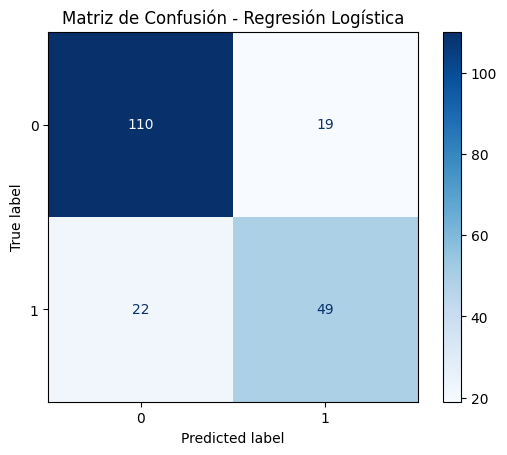

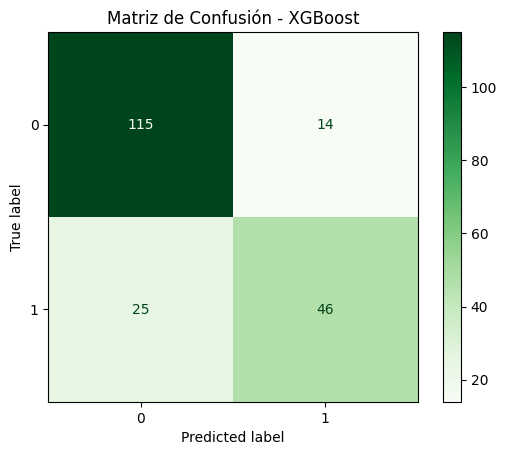

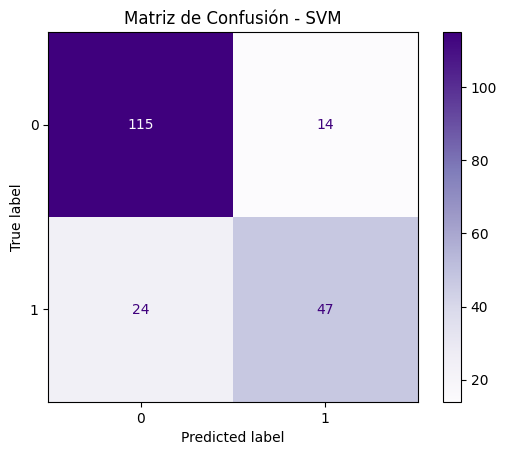

,Modelo,Clase Real,Predicho 0,Predicho 1
0,Regresión Logística,Real 0,110,19
1,Regresión Logística,Real 1,22,49
2,XGBoost,Real 0,115,14
3,XGBoost,Real 1,25,46
4,SVM,Real 0,115,14
5,SVM,Real 1,24,47


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# --- Función de estilo personalizada ---
def style_dataframe_exact_centered(df, caption=""):
    header_bg_color = '#34627e'
    header_text_color = '#FFFFFF'
    border_color = '#34495E'
    text_color = '#000000'
    even_row_color = '#bcd2de'
    odd_row_color = '#FFFFFF'

    df_str = df.astype(str)

    return df_str.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if i % 2 == 0 else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
            'color': text_color,
            'border-color': border_color,
            'text-align': 'center',
            'font-family': 'monospace'
        }) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase'),
                       ('text-align', 'center')]},
            {'selector': 'td',
             'props': [('border-color', border_color),
                       ('text-align', 'center')]},
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                       ('text-align', 'center'),
                       ('font-weight', 'bold'),
                       ('font-size', '16px'),
                       ('color', '#2c3e50')]},
        ]) \
        .set_caption(caption)

# --- Obtener predicciones usando los modelos ya entrenados ---
y_pred_lr = grid_search_lr.predict(X_test)          # Regresión Logística
y_pred_xgb = grid_search_xgb.predict(X_test_rf)     # XGBoost
y_pred_svm = grid_search_svm.predict(X_test_rf)     # SVM

# --- Calcular matrices de confusión ---
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_xgb = confusion_matrix(y_test_rf, y_pred_xgb)
cm_svm = confusion_matrix(y_test_rf, y_pred_svm)

# --- Mostrar matrices de confusión como gráficas ---
ConfusionMatrixDisplay(cm_lr).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

ConfusionMatrixDisplay(cm_xgb).plot(cmap='Greens')
plt.title("Matriz de Confusión - XGBoost")
plt.show()

ConfusionMatrixDisplay(cm_svm).plot(cmap='Purples')
plt.title("Matriz de Confusión - SVM")
plt.show()

# --- Convertir matrices en tablas ---
def matriz_a_df(cm, nombre_modelo):
    df = pd.DataFrame(cm,
                      index=['Real 0', 'Real 1'],
                      columns=['Predicho 0', 'Predicho 1'])
    df = df.reset_index().rename(columns={'index': 'Clase Real'})
    df['Modelo'] = nombre_modelo
    return df

df_lr = matriz_a_df(cm_lr, 'Regresión Logística')
df_xgb = matriz_a_df(cm_xgb, 'XGBoost')
df_svm = matriz_a_df(cm_svm, 'SVM')

# --- Unir tablas ---
tabla_confusion = pd.concat([df_lr, df_xgb, df_svm], ignore_index=True)
tabla_confusion = tabla_confusion[['Modelo', 'Clase Real', 'Predicho 0', 'Predicho 1']]

# --- Mostrar con estilo ---
display(style_dataframe_exact_centered(tabla_confusion, caption="Matrices de Confusión por Modelo"))

#### ***6.2 Curvas ROC y AUC para los 3 modelos***

,Modelo,AUC
1,XGBoost,0.8786
0,Regresión Logística,0.854
2,SVM,0.8326


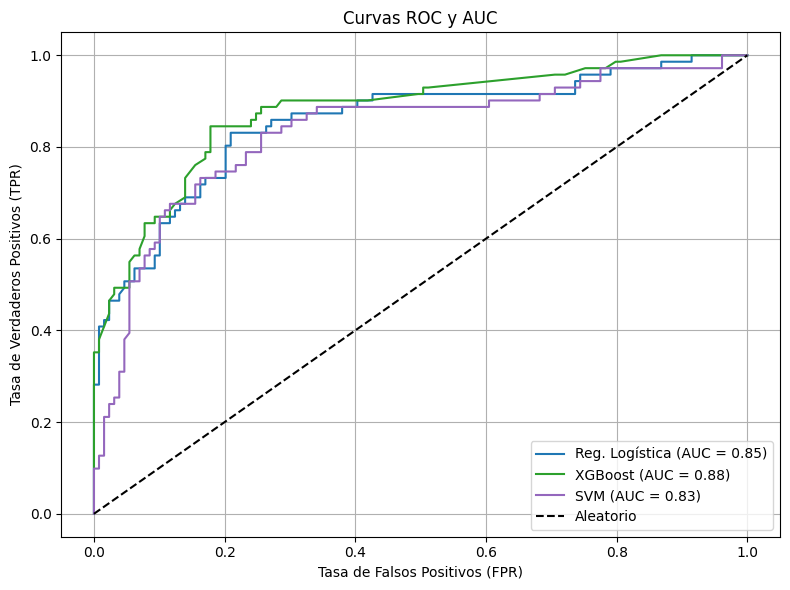

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# --- Función de estilo para tablas ---
def style_dataframe_exact_centered(df, caption=""):
    header_bg_color = '#34627e'
    header_text_color = '#FFFFFF'
    border_color = '#34495E'
    text_color = '#000000'
    even_row_color = '#bcd2de'
    odd_row_color = '#FFFFFF'

    df_str = df.astype(str)

    return df_str.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if i % 2 == 0 else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
            'color': text_color,
            'border-color': border_color,
            'text-align': 'center',
            'font-family': 'monospace'
        }) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase'),
                       ('text-align', 'center')]},
            {'selector': 'td',
             'props': [('border-color', border_color),
                       ('text-align', 'center')]},
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                       ('text-align', 'center'),
                       ('font-weight', 'bold'),
                       ('font-size', '16px'),
                       ('color', '#2c3e50')]},
        ]) \
        .set_caption(caption)

# --- Obtener probabilidades ---
y_score_lr = grid_search_lr.predict_proba(X_test)[:, 1]
y_score_xgb = grid_search_xgb.predict_proba(X_test_rf)[:, 1]
y_score_svm = grid_search_svm.predict_proba(X_test_rf)[:, 1]

# --- Calcular curvas ROC ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_rf, y_score_xgb)
fpr_svm, tpr_svm, _ = roc_curve(y_test_rf, y_score_svm)

# --- Calcular AUC ---
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# --- Crear DataFrame de AUCs ---
auc_df = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'XGBoost', 'SVM'],
    'AUC': [roc_auc_lr, roc_auc_xgb, roc_auc_svm]
}).sort_values(by='AUC', ascending=False)

# --- Redondear AUC ---
auc_df['AUC'] = auc_df['AUC'].round(4)

# --- Mostrar tabla con estilo ---
display(style_dataframe_exact_centered(auc_df, caption="Área Bajo la Curva (AUC) por Modelo"))

# --- Gráfica ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Reg. Logística (AUC = {roc_auc_lr:.2f})", color='#1f77b4')   # Azul
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", color='#2ca02c')        # Verde
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color='#9467bd')            # Púrpura
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")

plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC y AUC")
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

#### ***6.3 Importancia de características con SHAP para XGBoost***

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:23:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Feature,Mean SHAP Value (abs)
6,cat__sex_female,0.953057
5,cat__pclass_3.0,0.340889
0,num__age,0.198197
1,num__fare,0.135952
2,num__family_size,0.096935
3,cat__pclass_1.0,0.078384
8,cat__embarked_C,0.041314
4,cat__pclass_2.0,0.010307
10,cat__embarked_S,0.002875
7,cat__sex_male,0.0


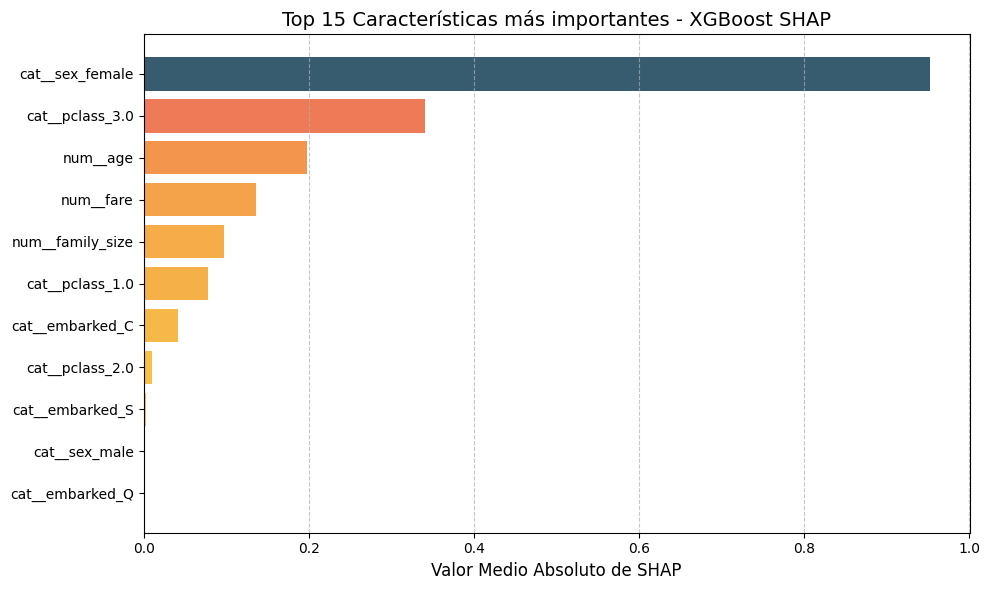

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from IPython.display import display
from xgboost import XGBClassifier

# --- Paleta de colores personalizada ---
custom_palette = ['#f6c145', '#f37b52', '#a7729a', '#375b6f']
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)

# --- Función de estilo para DataFrame ---
def style_dataframe_exact_centered(df, caption=""):
    header_bg_color = '#34627e'
    header_text_color = '#FFFFFF'
    border_color = '#34495E'
    text_color = '#000000'
    even_row_color = '#bcd2de'
    odd_row_color = '#FFFFFF'

    df_str = df.astype(str)

    return df_str.style \
        .apply(lambda x: [f'background-color: {even_row_color}' if i % 2 == 0 else f'background-color: {odd_row_color}' for i in range(len(x))], axis=0) \
        .set_properties(**{
            'color': text_color,
            'border-color': border_color,
            'text-align': 'center',
            'font-family': 'monospace'
        }) \
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', header_bg_color),
                       ('color', header_text_color),
                       ('border-color', border_color),
                       ('font-weight', 'bold'),
                       ('font-style', 'italic'),
                       ('text-transform', 'uppercase'),
                       ('text-align', 'center')]},
            {'selector': 'td',
             'props': [('border-color', border_color),
                       ('text-align', 'center')]},
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                       ('text-align', 'center'),
                       ('font-weight', 'bold'),
                       ('font-size', '16px'),
                       ('color', '#2c3e50')]},
        ]) \
        .set_caption(caption)

# --- Preprocesamiento ---
X_train_rf_df = pd.DataFrame(preprocessor_rf.transform(X_train_rf), columns=preprocessor_rf.get_feature_names_out())
X_test_rf_df = pd.DataFrame(preprocessor_rf.transform(X_test_rf), columns=preprocessor_rf.get_feature_names_out())

# --- Entrenamiento modelo base ---
xgb_params = {
    key.split('__')[1]: value
    for key, value in grid_search_xgb.best_params_.items()
    if key.startswith('classifier__')
}

xgb_base = XGBClassifier(
    **xgb_params,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_base.fit(X_train_rf_df, y_train_rf)

# --- Explicación SHAP ---
explainer = shap.Explainer(xgb_base)
shap_values = explainer(X_test_rf_df)

# --- Importancias SHAP ---
shap_importance_df = pd.DataFrame({
    'Feature': X_test_rf_df.columns,
    'Mean SHAP Value (abs)': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean SHAP Value (abs)', ascending=False)

# Mostrar tabla estilizada
top_n = 15
top_shap = shap_importance_df.head(top_n)
top_shap_df = top_shap.copy()
top_shap_df['Mean SHAP Value (abs)'] = top_shap_df['Mean SHAP Value (abs)'].round(6)

display(style_dataframe_exact_centered(top_shap_df, caption="Top 15 Características más importantes según SHAP"))

# --- Gráfica de barras con colores según importancia ---
norm = Normalize(top_shap['Mean SHAP Value (abs)'].min(), top_shap['Mean SHAP Value (abs)'].max())
colors = [cmap_custom(norm(val)) for val in top_shap['Mean SHAP Value (abs)']]

plt.figure(figsize=(10, 6))
plt.barh(
    top_shap['Feature'][::-1],
    top_shap['Mean SHAP Value (abs)'][::-1],
    color=colors[::-1]
)
plt.xlabel("Valor Medio Absoluto de SHAP", fontsize=12)
plt.title(f"Top {top_n} Características más importantes - XGBoost SHAP", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()